In [33]:
import math
import sys
import os
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib
from matplotlib import pyplot as plt
import time


sys.path.insert(0, "/global/homes/c/cinlima/gcrcatalogs-new/gcr-catalogs")
sys.path.insert(0, "/global/homes/c/cinlima/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/MachingCatalogs")


import GCRCatalogs
#Put nersc if using nersc
GCRCatalogs.set_root_dir_by_site("nersc")

print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

from clevar import ClCatalog, MemCatalog
from clevar.match import MembershipMatch, get_matched_pairs

from clevar.match import output_matched_catalog
import clevar

print('Clevar =', clevar.__version__)


# matplotlib.rcParams.update({'font.size': 22})
# matplotlib.rcParams.update({'figure.figsize': (10,8)})


<<<<<<< local <modified: >


GCRCatalogs = 1.9.0 | GCR = 0.9.2
Clevar = 0.14.1


GCRCatalogs = 1.9.0 | GCR = 0.9.2


>>>>>>> remote <modified: >
/global/homes/l/lettieri/.local/lib/python3.13/site-packages/hpgeom-0.0.0-py3.13-linux-x86_64.egg/hpgeom/_hpgeom.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


Clevar = 0.17.1


In [2]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_redmapper_v0.8.1')
gc_truth = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')  

In [3]:
quantities = gc.list_all_quantities()
cluster_quantities = [q for q in quantities if 'member' not in q]
member_quantities = [q for q in quantities if 'member' in q]

In [4]:
# query = GCRCatalogs.GCRQuery('(richness > ' + str(min_richness) +')')   
cluster_data = Table(gc.get_quantities(cluster_quantities))
member_data = Table(gc.get_quantities(member_quantities))

In [ ]:
# min_halo_mass = 1e13 #Msun
# redshift_max = 1.2

# quantities_wanted = ['redshift','halo_mass','halo_id','galaxy_id','ra','dec', 'is_central', 'mag_true_u_lsst', 'mag_true_g_lsst', 'mag_true_r_lsst', 'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst']

# query = GCRCatalogs.GCRQuery('(halo_mass > ' + str(min_halo_mass) +') & (redshift < ' + str(redshift_max) +')')
# truth_data = Table(gc_truth.get_quantities(quantities_wanted, [query]))
truth_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/truth_data.fits')

In [ ]:
RM_cat_name = 'cosmoDC2_v1.1.4_redmapper_v0.8.1'
DC2_cat_name = 'cosmoDC2_v1.1.4_image'

#Redmapper
RM_cat = ClCatalog(RM_cat_name, z=cluster_data["redshift"], ra=cluster_data["ra"], dec=cluster_data["dec"], id = cluster_data["cluster_id"], richness = cluster_data["richness"], richness_err=cluster_data["richness_err"], \
                   id_cg = cluster_data["id_cen_0"], ztrue_cg=cluster_data["redshift_true_cg"], p_cg_0=cluster_data["p_cen_0"])

pmem = member_data["p_member"] * member_data["pfree_member"] * member_data["theta_i_member"] * member_data["theta_r_member"] 

member_data.add_column(pmem, name="pmem")

RM_cat_members = MemCatalog("RM_members", id_cluster=member_data["cluster_id_member"], id=member_data["id_member"], ra=member_data["ra_member"], dec=member_data["dec_member"],
                            pmem=member_data["pmem"],  redshift=member_data["redshift_true_member"]) 

RM_cat.add_members(members_catalog=RM_cat_members)


#Dc2
halo_cat = ClCatalog(DC2_cat_name, z= truth_data["redshift"][truth_data["is_central"]],
                     ra= truth_data["ra"][truth_data["is_central"]], dec= truth_data["dec"][truth_data["is_central"]],
                     id=truth_data["halo_id"][truth_data["is_central"]], mass_fof=truth_data["halo_mass"][truth_data["is_central"]])

halo_cat_members = MemCatalog("halo_members", id_cluster=truth_data["halo_id"], id=truth_data["galaxy_id"], ra=truth_data["ra"], dec=truth_data["dec"],
                              redshift=truth_data["redshift"], is_central = truth_data["is_central"]) 

halo_cat.add_members(members_catalog=halo_cat_members)

RM_cat._init_match_vals(True)
halo_cat._init_match_vals(True)

/global/homes/c/cinlima/.local/lib/python3.11/site-packages/clevar-0.14.1-py3.11.egg/clevar/catalog/catalog.py:728: UserWarning: Some galaxies were not members of the cluster catalog. They are stored in leftover_members attribute.
  warnings.warn(


In [ ]:
RM_cat_name = 'cosmoDC2_v1.1.4_redmapper_v0.8.1'
DC2_cat_name = 'cosmoDC2_v1.1.4_image'

RM_cat = ClCatalog(RM_cat_name, z=cluster_data["redshift"], ra=cluster_data["ra"], dec=cluster_data["dec"], id = cluster_data["cluster_id"], mass = cluster_data["richness"], richness_err=cluster_data["richness_err"], \
                   id_cg = cluster_data["id_cen_0"], ztrue_cg=cluster_data["redshift_true_cg"], p_cg_0=cluster_data["p_cen_0"])



In [8]:
# RM_cat.write('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/cDC2_RM_match_cross_membership/RM_cat.fits', add_header =True, overwrite=True)

In [9]:
display(RM_cat)

In [ ]:
pmem = member_data["p_member"] * member_data["pfree_member"] * member_data["theta_i_member"] * member_data["theta_r_member"] 

#member_data.add_column(pmem, name="pmem")
member_data.replace_column("pmem",pmem) 

In [ ]:
RM_cat_members = MemCatalog("RM_members", id_cluster=member_data["cluster_id_member"], id=member_data["id_member"], ra=member_data["ra_member"], dec=member_data["dec_member"],
                            pmem=member_data["pmem"],  redshift=member_data["redshift_true_member"], 
                            mag_g_lsst_member=member_data["mag_g_lsst_member"], mag_r_lsst_member=member_data["mag_r_lsst_member"], 
                            mag_i_lsst_member=member_data["mag_i_lsst_member"], mag_z_lsst_member=member_data["mag_z_lsst_member"], mag_y_lsst_member=member_data["mag_y_lsst_member"]) 
RM_cat.add_members(members_catalog=RM_cat_members)

# RM_cat.members.write('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/cDC2_RM_match_cross_membership/RM_cat_members.fits', overwrite=True)
RM_cat

<<<<<<< local <modified: text/html, text/plain>


>>>>>>> remote <modified: text/html, text/plain>


In [ ]:
halo_cat = ClCatalog(DC2_cat_name, z= truth_data["redshift"][truth_data["is_central"]],
                     ra= truth_data["ra"][truth_data["is_central"]], dec= truth_data["dec"][truth_data["is_central"]],
                     id=truth_data["halo_id"][truth_data["is_central"]], mass=truth_data["halo_mass"][truth_data["is_central"]])
halo_cat

<<<<<<< local <modified: text/html, text/plain>


>>>>>>> remote <modified: text/html, text/plain>


In [12]:
# halo_cat.write('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/cDC2_RM_match_cross_membership/halo_cat.fits', overwrite=True)


In [13]:
halo_cat_members = MemCatalog("halo_members", id_cluster=truth_data["halo_id"], id=truth_data["galaxy_id"], ra=truth_data["ra"], dec=truth_data["dec"],
                              redshift=truth_data["redshift"], is_central = truth_data["is_central"] )

In [ ]:
halo_cat_members

<<<<<<< local


>>>>>>> remote
<<<<<<< local <removed>


>>>>>>> remote <modified: text/html, text/plain>


In [ ]:
halo_cat.add_members(members_catalog=halo_cat_members)

<<<<<<< local <modified: >
/global/homes/c/cinlima/.local/lib/python3.11/site-packages/clevar-0.14.1-py3.11.egg/clevar/catalog/catalog.py:728: UserWarning: Some galaxies were not members of the cluster catalog. They are stored in leftover_members attribute.
  warnings.warn(
>>>>>>> remote <removed>


In [16]:
# halo_cat.members.write('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/cDC2_RM_match_cross_membership/halo_cat_members.fits', overwrite=True)


In [ ]:
#RM_cat = ClCatalog.read('RM_cat_richness_min_'+str(min_richness)+'.fits', name='RM_cat', full=True, tags={'mass':'richness'})
#halo_cat = ClCatalog.read('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'.fits', name='halo_cat', full=True, tags={'mass':'mass_fof'})



In [ ]:
# RM_cat.read_members('RM_cat_richness_min_'+str(min_richness)+'_members.fits',  full=True)
# halo_cat.read_members('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'_members.fits', full=True)


In [ ]:
RM_cat._init_match_vals(True)
halo_cat._init_match_vals(True)

In [ ]:
mt = MembershipMatch()
match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'preference': 'shared_member_fraction', # other options are more_massive, angular_proximity or redshift_proximity
    'minimum_share_fraction': -0.5,
    'match_members_kwargs': {'method':'id'},
}
mt.match_from_config(RM_cat, halo_cat, match_config)


<<<<<<< local <modified: >


1,085,430 members were matched.

## Multiple match (catalog 1)
Finding candidates (cosmoDC2_v1.1.4_redmapper_v0.8.1)
* 43,106/45,081 objects matched.

## Multiple match (catalog 2)
Finding candidates (cosmoDC2_v1.1.4_image)
  72,185(249,557) - 0 candidates

>>>>>>> remote <removed>
<<<<<<< local
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




## Finding unique matches of catalog 1
Unique Matches (cosmoDC2_v1.1.4_redmapper_v0.8.1)
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.021687124077123542
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 31088
share_mems2[id1]: 6.0
share_mems2.get(id1_replace, 0): 7.0
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.8521287006823564
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 2427
share_mems2[id1]: 20.0
share_mems2.get(id1_replace, 0): 21.0
ENTROU NA FUNÇÃO
shared_frac: 0.01668090087313338
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 8818
share_mems2[id1]: 4.0
share_mems2.get(id1_replace, 0): 10.0
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.005138662570710374
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 765
share_mems2[id1]: 1.0
share_mems2.get(id1_replace, 0):

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



shared_frac: 0.058823529411764705
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 1726700042266
share_mems2[id1]: 0.052614014595746994
share_mems2.get(id1_replace, 0): 18.001124545931816
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.21428571428571427
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 2908000130230
share_mems2[id1]: 1.671174019575119
share_mems2.get(id1_replace, 0): 1.7298823595046997
ENTROU NA FUNÇÃO
shared_frac: 0.15384615384615385
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 1703200143279
share_mems2[id1]: 1.899150550365448
share_mems2.get(id1_replace, 0): 1.963218865916133
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.23076923076923078
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 849400067279
share_mems2[id1]: 0.9354365915060043
share_mems2.get(id1_replace, 0): 15.880907833576202
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
EN

>>>>>>> remote
<<<<<<< local <unchanged>
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

>>>>>>> remote <removed>
<<<<<<< local


ENTROU NA FUNÇÃO
shared_frac: 0.75
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 884500151315
share_mems2[id1]: 0.8524313047528267
share_mems2.get(id1_replace, 0): 4.346720308065414
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.05555555555555555
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 726500060272
share_mems2[id1]: 0.16516700387001038
share_mems2.get(id1_replace, 0): 15.233862668275833
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
shared_frac: 0.5
minimum_share_fraction: 0
cat2["mt_other"][ind2]: 251700146315
share_mems2[id1]: 1.340051606297493
share_mems2.get(id1_replace, 0): 5.57384717464447
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENTROU NA FUNÇÃO
ENT

>>>>>>> remote
<<<<<<< local <removed>


1,085,430 members were matched.

## Multiple match (catalog 1)
Finding candidates (cosmoDC2_v1.1.4_redmapper_v0.8.1)
* 43,106/45,081 objects matched.

## Multiple match (catalog 2)
Finding candidates (cosmoDC2_v1.1.4_image)
* 74,474/249,557 objects matched.

## Finding unique matches of catalog 1
Unique Matches (cosmoDC2_v1.1.4_redmapper_v0.8.1)
* 42,914/45,081 objects matched.

## Finding unique matches of catalog 2
Unique Matches (cosmoDC2_v1.1.4_image)
* 42,917/249,557 objects matched.
Cross Matches (cosmoDC2_v1.1.4_redmapper_v0.8.1)
* 42,914/45,081 objects matched.
Cross Matches (cosmoDC2_v1.1.4_image)
* 42,914/249,557 objects matched.


>>>>>>> remote <modified: >


In [ ]:
mt.save_matches(RM_cat, halo_cat, out_dir='cDC2_RM_match_cross_membership', overwrite=True)


In [22]:
mt.load_matches(RM_cat, halo_cat, out_dir='cDC2_RM_match_cross_membership')

# mt.load_matches(RM_cat, halo_cat, out_dir='/global/homes/c/cinlima/Data/CDC2Data/cosmoDC2_RM_match_cross_membership')



cosmoDC2_v1.1.4_redmapper_v0.8.1
    * ClEvar used in matching: 0.14.1
 * Total objects:    45,081
 * multiple (self):  43,106
 * multiple (other): 43,106
 * unique (self):    42,914
 * unique (other):   42,917
 * cross:            42,914

cosmoDC2_v1.1.4_image
    * ClEvar used in matching: 0.14.1
 * Total objects:    249,557
 * multiple (self):  74,474
 * multiple (other): 74,474
 * unique (self):    42,917
 * unique (other):   42,914
 * cross:            42,914


In [27]:
mt.load_matches(RM_cat, halo_cat, out_dir='cDC2_RM_match_cross_membership')


cosmoDC2_v1.1.4_redmapper_v0.8.1
    * ClEvar used in matching: 0.17.1
 * Total objects:    45,081
 * multiple (self):  43,106
 * multiple (other): 43,106
 * unique (self):    42,914
 * unique (other):   42,917
 * cross:            42,914

cosmoDC2_v1.1.4_image
    * ClEvar used in matching: 0.17.1
 * Total objects:    249,557
 * multiple (self):  74,474
 * multiple (other): 74,474
 * unique (self):    42,917
 * unique (other):   42,914
 * cross:            42,914


In [45]:
#RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cross')
{int(a) for a in halo_cat_bij['id']}
#halo_cat_bij['id']== 3696200176219
#halo_cat_bij[halo_cat_bij['id']== str(1162500021323)]
halo_cat_bij[halo_cat_bij['id']== str(3696200176219)]

In [ ]:
RM_cat_bij.size, RM_cat_bij.size/RM_cat.size,  halo_cat_bij.size/halo_cat.size


(42914, 0.9519309687007831, 0.1719607143858918)

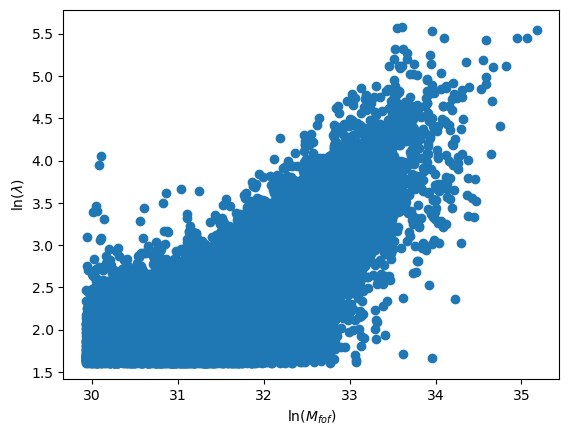

In [25]:
plt.scatter(np.log(halo_cat_bij['mass']),np.log(RM_cat_bij['mass']))
# plt.scatter(halo_cat_bij['mass_fof'],RM_cat_bij['richness'])

plt.xlabel('$\ln (M_{fof}$)')
plt.ylabel('$\ln (\lambda)$')
plt.show()




In [26]:
clevar_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_ID.fits')

# clevar_data

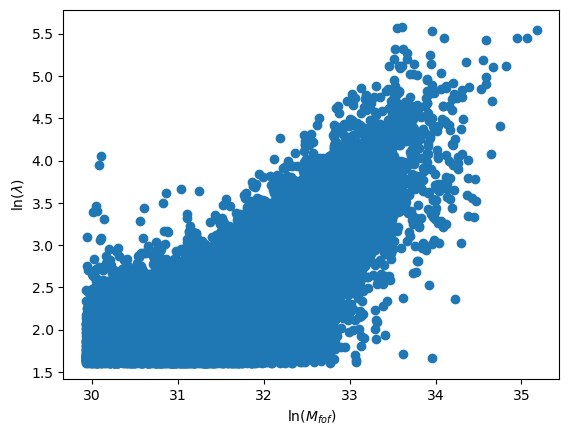

Text(0, 0.5, '$\\ln (\\lambda)$')

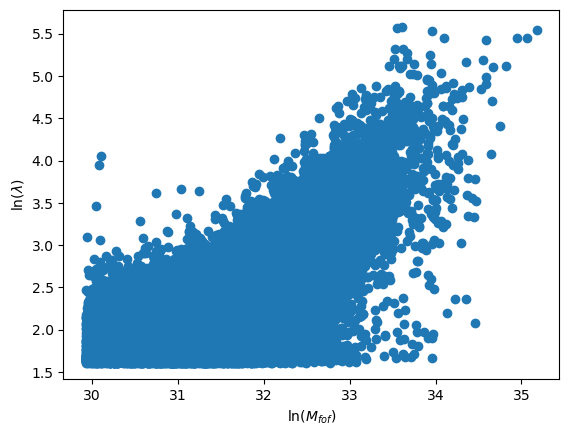

In [27]:
plt.scatter(np.log(halo_cat_bij['mass']),np.log(RM_cat_bij['mass']))
# plt.scatter(halo_cat_bij['mass_fof'],RM_cat_bij['richness'])

plt.xlabel('$\ln (M_{fof}$)')
plt.ylabel('$\ln (\lambda)$')
plt.show()


plt.scatter(np.log(clevar_data['halo_mass']),np.log(clevar_data['richness']))

plt.xlabel('$\ln (M_{fof}$)')
plt.ylabel('$\ln (\lambda)$')

In [28]:
#Table([halo_cat_bij['mass'], RM_cat_bij['mass'], RM_cat_bij['z']])
RM_cat

<<<<<<< local


>>>>>>> remote
